# Model Validation 실습__김혜빈

# 1. Model Capacity
- import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
   - 'Model_Validation.csv' From github

In [ ]:
moval = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')
moval.info()
# 1000행 2열, null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inputs   1000 non-null   float64
 1   Outputs  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
moval.head()

,Inputs,Outputs
0,-0.752759,-0.352622
1,2.704286,0.192409
2,1.391964,0.558147
3,0.591951,0.950694
4,-2.063888,-1.212273


- 산점도(Inputs vs. Outputs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


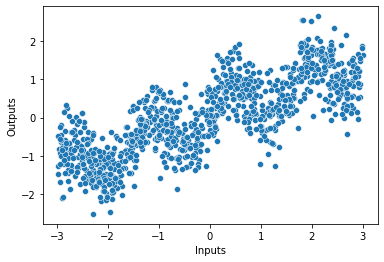

In [ ]:
sns.scatterplot(moval['Inputs'], moval['Outputs'])
plt.show()

> ## 1) 5차 모델 시각화

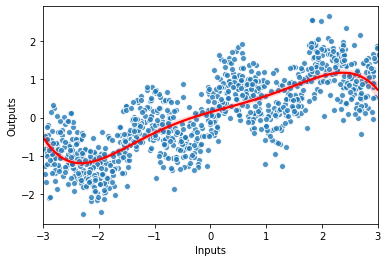

In [ ]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval,
            line_kws = {'color': 'red'},
            scatter_kws = {'edgecolor': 'white'},
            order = 5)
plt.xlim(-3, 3) 
plt.show()

> ## 2) 7차 모델 시각화

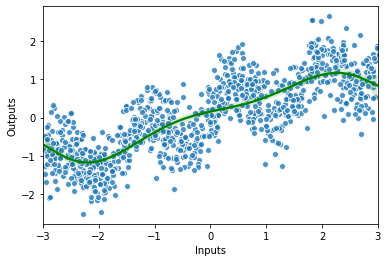

In [ ]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval,
            line_kws = {'color': 'green'},
            scatter_kws = {'edgecolor': 'white'},
            order = 7)
plt.xlim(-3, 3) 
plt.show()

> ## 3) 9차 모델 시각화

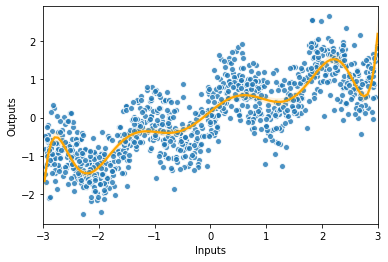

In [ ]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval,
            line_kws = {'color': 'orange'},
            scatter_kws = {'edgecolor': 'white'},
            order = 9)
plt.xlim(-3, 3) 
plt.show()

> ## 4) 3개 모델 비교 시각화

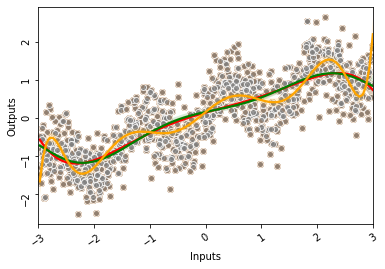

In [ ]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval, line_kws = {'color': 'red'},order = 5)
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval, line_kws = {'color': 'green'},order = 7)
sns.regplot(x = 'Inputs', y = 'Outputs', data = moval, line_kws = {'color': 'orange'},order = 9,
          scatter_kws = {'color' : 'gray', 'edgecolor' : 'white'})
plt.xlim(-3, 3)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()
# 3개의 모델 중 어떤 모델이 오차가 가장 작은지 찾아야 한다.

# 2. Testing Error
- import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

> ## Train_Data vs. Test_Data

### (1) Array Split
- 7:3 Split(700 : 300)
- 70% Train_df & 30% Test_df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(moval[['Inputs']], moval['Outputs'],
                                                    test_size = 0.3, random_state = 2045)
# x변수가 train, test로 쪼개지고, y변수가 train, test로 쪼개진다.
# 비율은 train : test = 7 : 3  

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((700, 1), (300, 1), (700,), (300,))

- 70% X_train Array

In [ ]:
X_train.head()

,Inputs
818,-2.671430
615,2.525234
872,0.863997
394,-0.955179
435,1.205815


- 30% X_test Array

In [ ]:
X_test.head()

,Inputs
665,-2.082845
200,0.852190
439,-2.511907
881,1.031356
689,-1.877738


- 70% y_train Array

In [ ]:
y_train.head()
# X_train와 index가 같음을 알 수 있다

818   -0.849129
615    1.042056
872    0.374570
394   -0.540516
435    0.729848
Name: Outputs, dtype: float64

- 30% y_test Array

In [ ]:
y_test.head()
# X_test와 index가 같음을 알 수 있다

665   -1.811198
200    0.686995
439    0.108298
881    0.040331
689   -1.187437
Name: Outputs, dtype: float64

### (3) Distribution Visualization : 잘 나눠졌는지 시각화로 확인

- Train Data

In [65]:
y_train.shape
type(y_train)

pandas.core.series.Series

In [60]:
y_train.head()

818   -0.849129
615    1.042056
872    0.374570
394   -0.540516
435    0.729848
Name: Outputs, dtype: float64

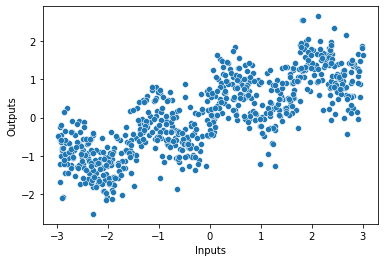

In [66]:
sns.scatterplot(x = X_train['Inputs'], y = y_train)
plt.show()
# 오류 해결 : X_train은 DF, y_train은 Series이므로 
# X_train에는 출력할 컬럼명을 써주고, y_train은 쓸 필요 없다.(고를 필요가 없기 때문) 

- Test Data

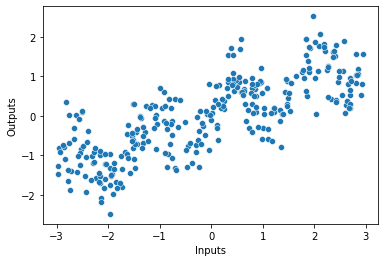

In [67]:
sns.scatterplot(x = X_test['Inputs'], y = y_test)
plt.show()
# 오류 해결 : 위와 같은 방법으로 해결

> ## 1) 5차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False) 
px_5_TR = poly.fit_transform(X_train)
# 5차 모델은 다항 함수이기 때문에 본 셀과 같은 과정 필요

In [ ]:
from sklearn.linear_model import LinearRegression

model_5 = LinearRegression()
model_5.fit(px_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
px_5_TE = poly.fit_transform(X_test)
y_hat_5 = model_5.predict(px_5_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_5 = mean_squared_error(y_test, y_hat_5)
TE_err_5

0.3602980472002336

> ## 2) 7차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 7, include_bias = False) 
px_7_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model_7 = LinearRegression()
model_7.fit(px_7_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
px_7_TE = poly.fit_transform(X_test)
y_hat_7 = model_7.predict(px_7_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_7 = mean_squared_error(y_test, y_hat_7)
TE_err_7

0.35784993736519366

> ## 3) 9차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False) 
px_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model_9 = LinearRegression()
model_9.fit(px_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
px_9_TE = poly.fit_transform(X_test)
y_hat_9 = model_9.predict(px_9_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_9 = mean_squared_error(y_test, y_hat_9)
TE_err_9

0.2893114750133329

> ## 4) 3개 모델 Testing Error 비교

In [ ]:
print('5차 모델: ', TE_err_5)
print('7차 모델: ', TE_err_7)
print('9차 모델: ', TE_err_9)
# 9차 모델의 MSE가 가장 작다.

5차 모델:  0.3602980472002336
7차 모델:  0.35784993736519366
9차 모델:  0.2893114750133329
